# Extração de características

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(67834, 29)

In [4]:
df.columns = [i.lower().strip().replace(' ', '_') for i in df.columns]

In [5]:
mantem = [
       'protocol', 'flow_duration',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min',
       'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min',
       'label'
]

In [6]:
df_velho = df

In [7]:
df = df_velho[mantem].copy()

In [8]:
pd.set_option('display.max_columns', None)
df.describe()

,protocol,flow_duration,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min
count,67834.000000,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04
mean,12.167291,2.991884e+06,3.155927e+05,2.209662e+05,8.983857e+05,1.924432e+05,3.500551e+05,2.301546e+05,8.696493e+05,2.107766e+05,1.197037e+05,1.191297e+05,4.760216e+05,5.158576e+04
std,5.459410,4.063005e+06,6.988069e+05,6.409506e+05,1.738476e+06,5.780313e+05,8.391263e+05,6.798476e+05,1.751949e+06,7.226870e+05,5.661864e+05,4.639722e+05,1.409648e+06,4.873526e+05
min,6.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.255000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-3.160000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-3.270000e+02
25%,6.000000,4.435975e+04,9.951270e+03,0.000000e+00,2.892575e+04,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,17.000000,4.108570e+05,8.344079e+04,0.000000e+00,1.786225e+05,1.371500e+03,1.996805e+04,0.000000e+00,9.849300e+04,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,17.000000,7.325550e+06,4.106090e+05,5.790789e+04,4.641098e+05,2.075310e+05,4.112370e+05,3.034664e+04,4.395022e+05,2.030412e+05,1.787560e+04,9.415839e+03,8.278800e+04,1.700000e+01
max,17.000000,1.000000e+07,9.987113e+06,7.045491e+06,9.998126e+06,9.987113e+06,9.997140e+06,7.065086e+06,9.997140e+06,9.997140e+06,9.996903e+06,7.053719e+06,9.996903e+06,9.996903e+06


## Colunas correlacionadas

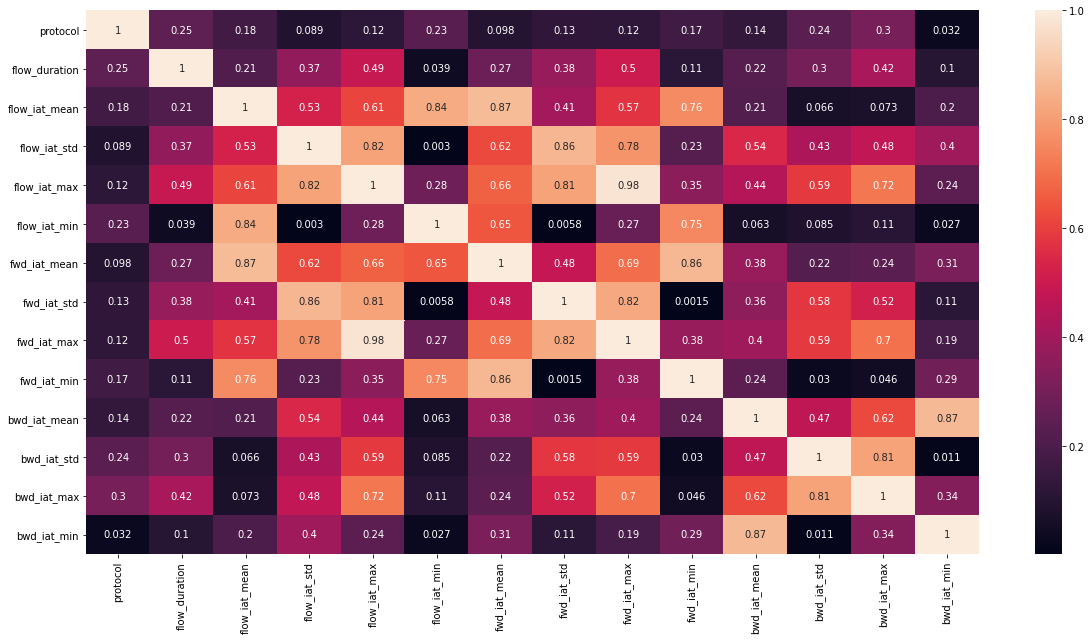

In [9]:
plt.figure(figsize=(20,10))
corr = df.corr().abs()
ax = sns.heatmap(corr, annot=corr)
plt.show()

### Atributos flow

As colunas `flow_iat_*` são altamente relacionadas às colunas `fwd_iat_*`, portanto não parece necessário manter essas colunas na matriz de treinamento.

|Nome|Valor|
|----|-----|
|mean| 0.87|
|std | 0.86|
|max | 0.98|
|min | 0.75|


### Atributos _mean

As colunas `fwd_iat_mean` e `bwd_iat_mean` são altamente relacionadas às suas respectivas colunas `_min`.
Logo, também acho que pode tirar essas colunas.

|Nome|Valor|
|----|-----|
|fwd | 0.86|
|bwd | 0.87|

### Atributos _std

As colunas `fwd_iat_std` e `bwd_iat_std` são altamente relacionadas às suas respectivas colunas `_max`.
Então, da mesma forma que os atributos `_mean`, essas colunas podem ser ignoradas.

|Nome|Valor|
|----|-----|
|fwd | 0.82|
|bwd | 0.81|

In [16]:
(df['protocol'] == 6)

0         True
1         True
2         True
3         True
4         True
         ...  
67829    False
67830    False
67831     True
67832     True
67833     True
Name: protocol, Length: 67834, dtype: bool

In [17]:
mantem = [
    'protocol', 'flow_duration', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_max', 'bwd_iat_min', 'label'
]
df_ml = df[mantem].copy()
df_ml['protocol'] = (df['protocol'] == 6).astype(int) ## TCP = 6 = 1 ; UDP = 17 = 0
df_ml['label'] = (df['label'] == 'TOR').astype(int) ## TOR = 1 ; nonTOR = 0

In [18]:
from sklearn.utils import shuffle

df_shuffle = shuffle(df_ml, random_state=21).reset_index(drop=True)

int_80 = int(df_shuffle.shape[0] * 0.8)

df_80 = df_shuffle.loc[:int_80, :]
df_20 = df_shuffle.loc[int_80:, :]

In [19]:
def adiciona_anotacao(axis):
    for rect in axis.patches:
        height = round(rect.get_height(), 3)
        axis.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

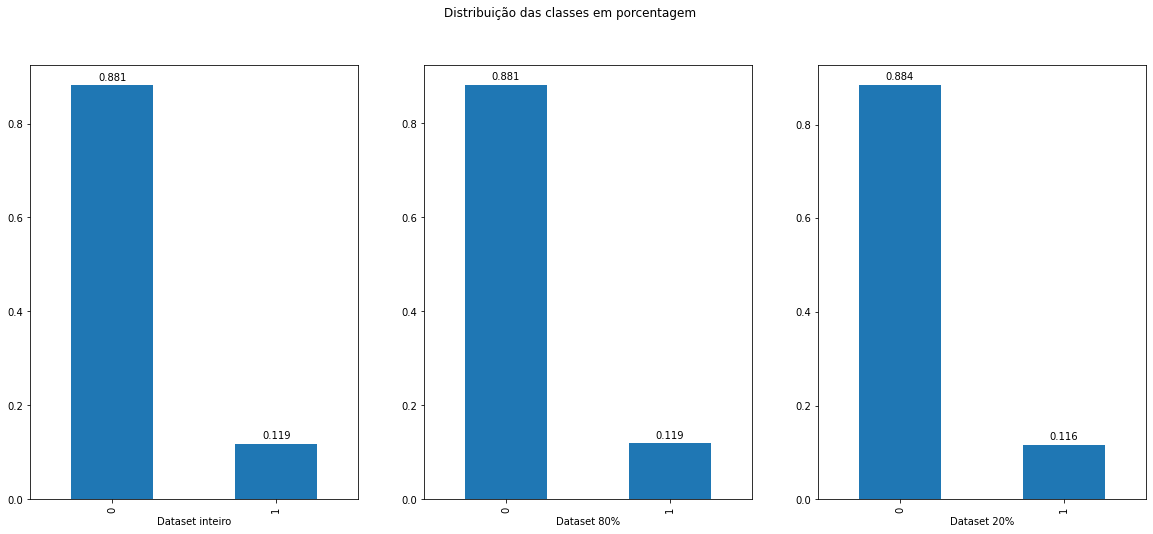

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(20,8))
ax = df_shuffle['label'].value_counts(normalize=True).plot.bar(ax=axs[0])
adiciona_anotacao(ax)
ax.set_xlabel('Dataset inteiro')

ax1 = df_80['label'].value_counts(normalize=True).plot.bar(ax=axs[1])
adiciona_anotacao(ax1)
ax1.set_xlabel('Dataset 80%')

ax2 =df_20['label'].value_counts(normalize=True).plot.bar(ax=axs[2])
adiciona_anotacao(ax2)
ax2.set_xlabel('Dataset 20%')

plt.suptitle('Distribuição das classes em porcentagem')
plt.show()